In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# --- CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# Tipografia redimensionada para otimização em PDF (Conforme aprovado)
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Definição do tema
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Força o uso da fonte DejaVu Sans, que tem todos os glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

### Transformação Logarítmica e Correção de Assimetria

Este script gera a **Figura [FIG_T_LOG]** para a Aula 4. 
A imagem demonstra o impacto de uma **transformação matemática** nos dados para correção de assimetria (*Skewness*).
* **(a) Distribuição Original:** Observaremos a variável original com assimetria à direita (longa cauda de outliers), muito comum em variáveis monetárias.
* **(b) Transformação Logarítmica:** Após aplicar o Log na base 10 (conforme fundamentado no texto), verificaremos a "compressão" da escala e como a curva resultante se aproxima da normalidade, um requisito essencial para diversos algoritmos de Machine Learning.

In [2]:
# --- CARREGAMENTO DE DADOS COM TRATAMENTO DE ERROS DIDÁTICO ---
# Conforme manual do conteudista, NÃO gerar fallback com dados sintéticos.
PATH_DATA = '../data/ames_housing/train.csv'

try:
    df_ames = pd.read_csv(PATH_DATA)
    # Variável alvo: SalePrice (Preço de Venda)
    # Dividimos por 1.000 apenas na original para deixar o eixo X mais limpo (k$)
    preco_original = df_ames['SalePrice'] / 1000 
    
    # Aplicamos o log na base 10 diretamente nos preços reais, conforme o texto da apostila
    preco_log10 = np.log10(df_ames['SalePrice']) 
    print("Dataset Ames Housing carregado com sucesso!")
    
except FileNotFoundError:
    print("-" * 80)
    print("ERRO: O arquivo 'train.csv' não foi encontrado na pasta '../data/ames_housing/'.")
    print("INSTRUÇÕES PARA O ALUNO:")
    print("1. Acesse o Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques")
    print("2. Baixe o arquivo 'train.csv' na aba 'Data'.")
    print("3. Crie a pasta '../data/ames_housing/' e coloque o arquivo lá.")
    print("-" * 80)
    # Interrompe a execução se os dados não existirem
    raise SystemExit

Dataset Ames Housing carregado com sucesso!


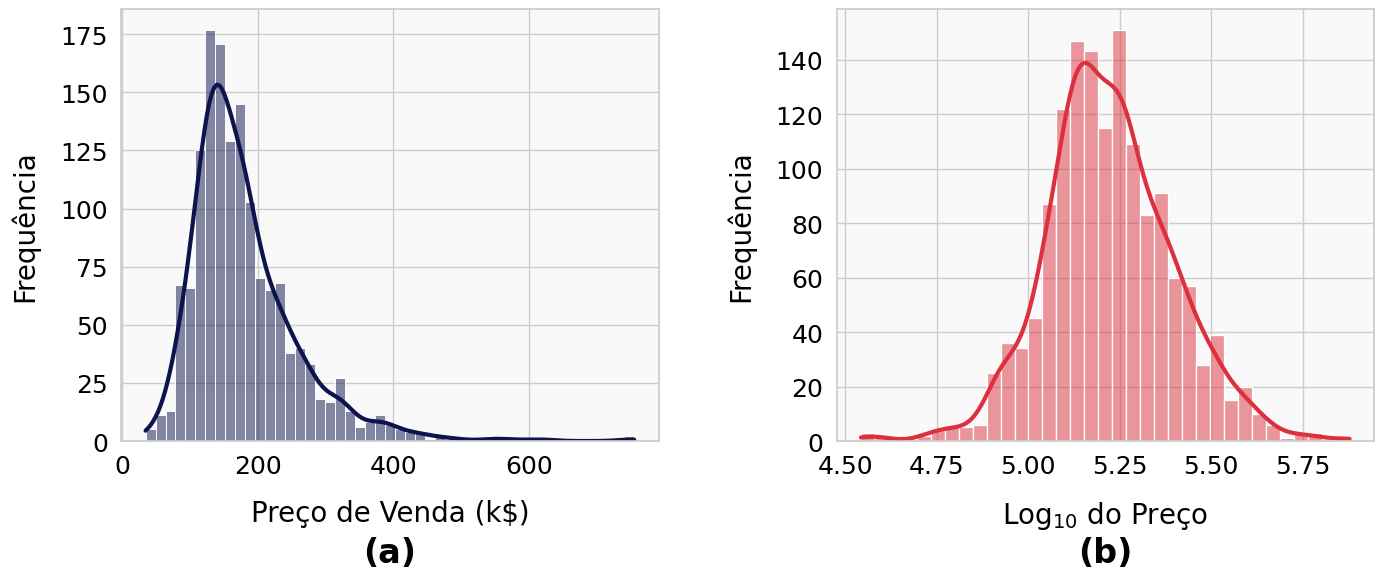

In [3]:
# Configuração da figura (Proporção horizontal ajustada para PDF)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), facecolor=COR_BRANCO)

# ==========================================================
# (a) SUBPLOT ESQUERDO: Distribuição Original (Assimetria)
# ==========================================================
# Utilizamos o histplot do Seaborn com a curva KDE sobreposta
sns.histplot(preco_original, kde=True, color=COR_AZUL_PRINCIPAL, alpha=0.5, ax=ax1, 
             line_kws={'linewidth': 3}, edgecolor=COR_BRANCO)

ax1.set_xlabel('Preço de Venda (k$)', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax1.set_ylabel('Frequência', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax1.yaxis.get_offset_text().set_visible(False)

# ==========================================================
# (b) SUBPLOT DIREITO: Distribuição Transformada (Log Base 10)
# ==========================================================
# Representação da variável corrigida destacada na cor secundária (Vermelho GRAN)
sns.histplot(preco_log10, kde=True, color=COR_VERMELHO, alpha=0.5, ax=ax2, 
             line_kws={'linewidth': 3}, edgecolor=COR_BRANCO)

ax2.set_xlabel(r'Log$_{10}$ do Preço', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)
ax2.set_ylabel('Frequência', fontsize=FONT_LABEL, color=COR_PRETO, labelpad=15)

# ==========================================================
# FINALIZAÇÃO: Layout, Eixos e Salvamento
# ==========================================================
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)
    
# Posiciona as labels (a) e (b) ancoradas nos subplots
ax1.text(0.5, -0.28, '(a)', transform=ax1.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')
ax2.text(0.5, -0.28, '(b)', transform=ax2.transAxes, fontsize=FONT_SUBFIGURE, fontweight='bold', color=COR_PRETO, ha='center')

# Ajustes de espaçamento para as fontes maiores
plt.tight_layout(w_pad=4.0)
fig.subplots_adjust(bottom=0.25)

# Salvamento padronizado
caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_04')
os.makedirs(caminho_save, exist_ok=True)
plt.savefig(os.path.join(caminho_save, '03_transformacao_log.png'), dpi=300)

plt.show()